LOGISTIC REGRESSION PRACTICAL IMPLEMENTATION

In [19]:
import seaborn as sns
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [24]:
df['species']=='vesicolor'  ## we will use only two species iris and virginica as logistic regression is a binary classifier

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [26]:
df=df[df['species']!='vesicolor']

In [27]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
df['species'].map({'setosa': 1, 'virginica' : 0})

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
145    0.0
146    0.0
147    0.0
148    0.0
149    0.0
Name: species, Length: 150, dtype: float64

In [31]:
df['species'] = df['species'].map({'setosa': 1, 'virginica': 0})
df['species'] = df['species'].fillna(-1).astype('int64')

In [32]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [33]:
## Split dataset into independent and dependent features

In [34]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [35]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [42]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1', 'l2', 'elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50], 'max_iter':[100,200,300]}

In [43]:
classifier_regressor = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5) 

In [44]:
classifier_regressor.fit(X_train, y_train)

C:\Users\Meghali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Meghali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://s

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 2, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [46]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [47]:
print(classifier_regressor.best_score_)

0.9636363636363636


In [48]:
## prediction
y_pred=classifier_regressor.predict(X_test)

In [50]:
## accuracy score

In [51]:
from sklearn.metrics import accuracy_score, classification_report

In [52]:
score =  accuracy_score(y_pred, y_test)
print(score)

1.0


In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        11
           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



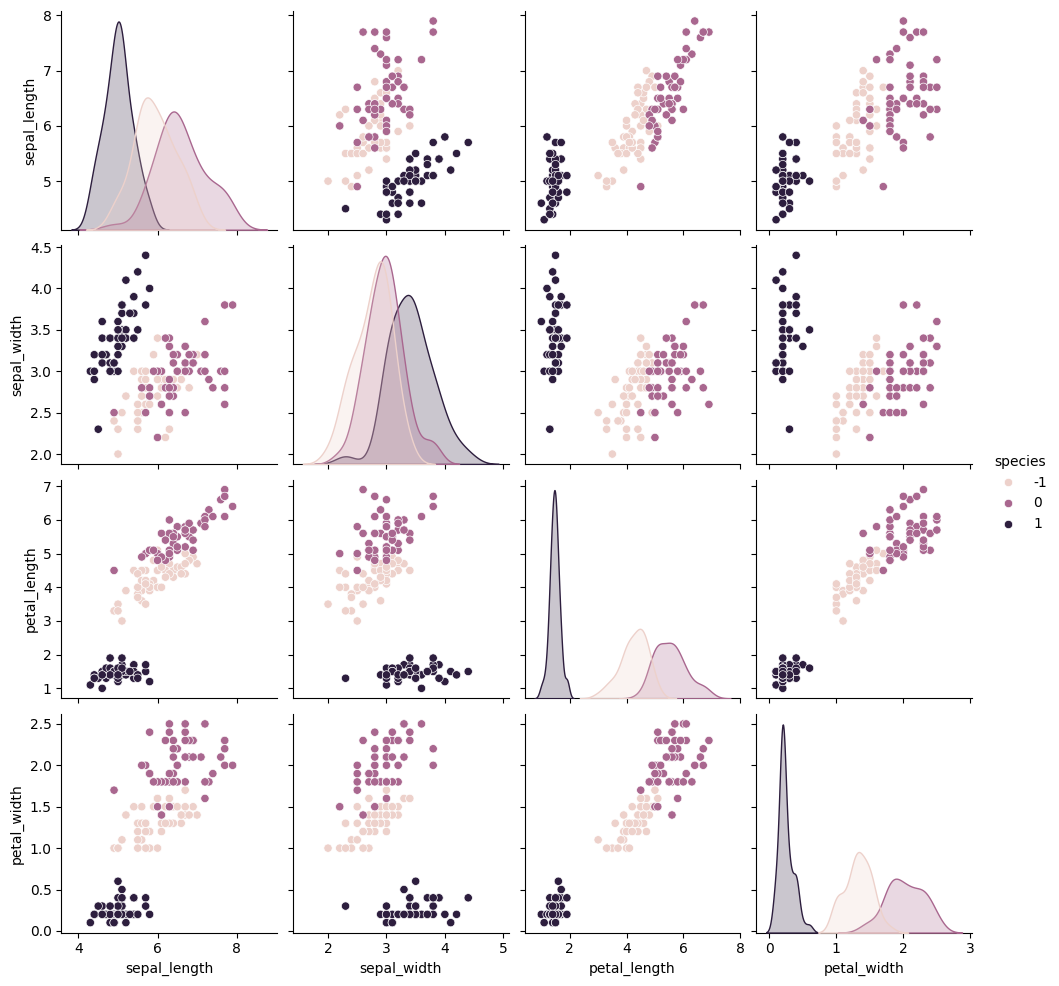

In [55]:
 sns.pairplot(df, hue='species')

In [56]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.460039
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.612165
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.649101
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.580749
species,-0.460039,0.612165,-0.649101,-0.580749,1.000000


In [61]:
## Confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

In [62]:
cm

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 15]])

<Axes: >

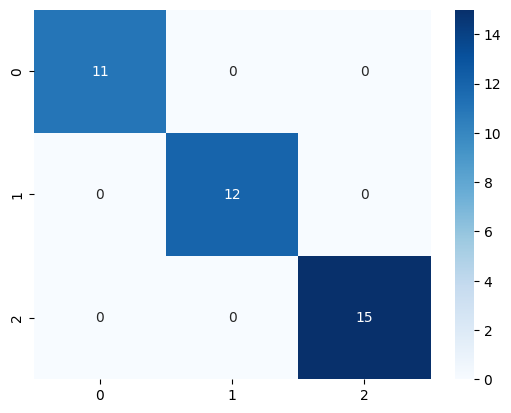

In [63]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


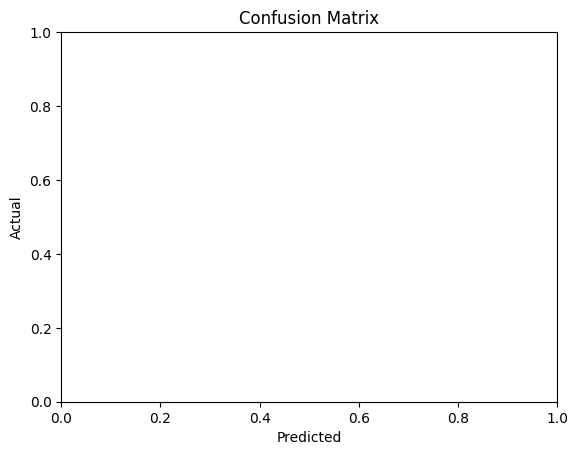

In [64]:
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [69]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [74]:
from sklearn.preprocessing import label_binarize   ## i have 3 classes in y_test so needed to binarize

y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])

In [75]:
y_prob = classifier_regressor.predict_proba(X_test)

In [76]:
auc_score = roc_auc_score(
    y_test_bin, 
    y_prob, 
    multi_class='ovr', 
    average='macro'
)

print("AUC Score:", auc_score)

AUC Score: 1.0


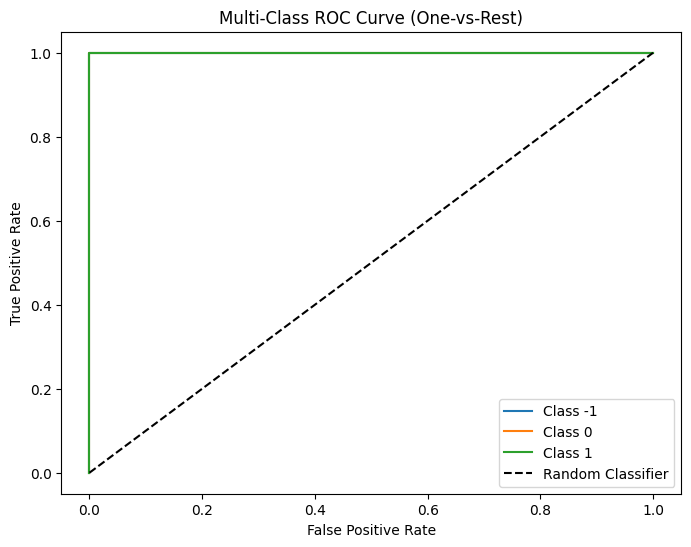

In [78]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

classes = [-1, 0, 1]

plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {classes[i]}")

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()
